<a href="https://colab.research.google.com/github/ojustice1/CSC302_Hamilton_Justice_Wallace-Group-5_Final/blob/main/Final_Presentation_World_Happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# START 

In [ ]:
import pandas as pd
whr22 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/302groupshare/Happiness 2022_Regions.csv')

whr22.head()


,RANK,Country,Region,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,Northern Europe,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,Northern Europe,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,Northern Europe,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,Western Europe,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,Western Europe,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


In [ ]:
df.columns


Index(['Region', 'Happiness score'], dtype='object')

# World Happiness By Country- Cmap/AH 

In [ ]:
!pip install geopandas
!pip install descartes
!pip install mapclassify
!pip install pysal
!pip install contextily

/usr/local/lib/python3.9/dist-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
<ipython-input-19-3b9a3dae27e1>:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  imp

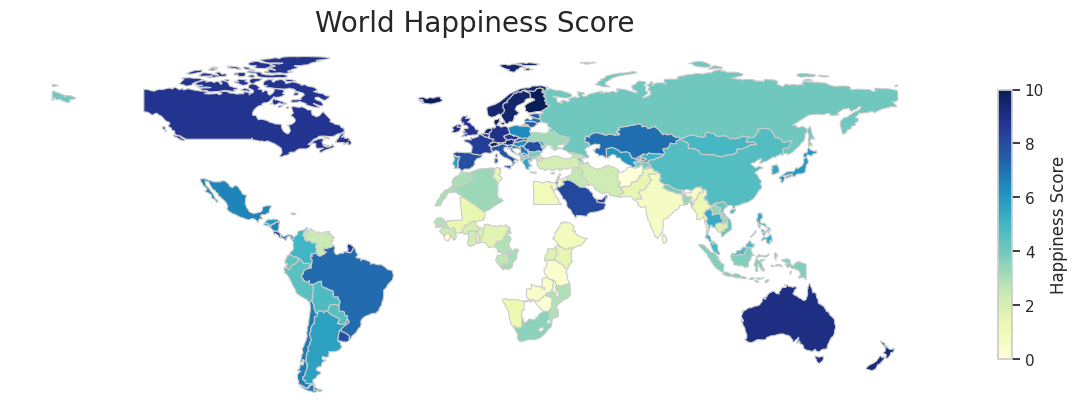

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/302groupshare/2022.csv", usecols=['Country', 'Happiness score'])

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged = world.merge(df, left_on='name', right_on='Country')

cmap = plt.cm.get_cmap('YlGnBu')

fig, ax = plt.subplots(figsize=(15,7))
merged.plot(column='Happiness score', cmap=cmap, linewidth=0.8, edgecolor='0.8', ax=ax)

ax.set_title('World Happiness Score', fontdict={'fontsize': 20})
ax.set_axis_off()

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=10))
sm._A = []
cbar = fig.colorbar(sm, shrink=0.5)
cbar.set_label('Happiness Score')


# Happiness Map Comparision of Europe and Asia /AH 

In [ ]:
!pip install geopandas


<ipython-input-5-45219e1d779a>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds', 7)


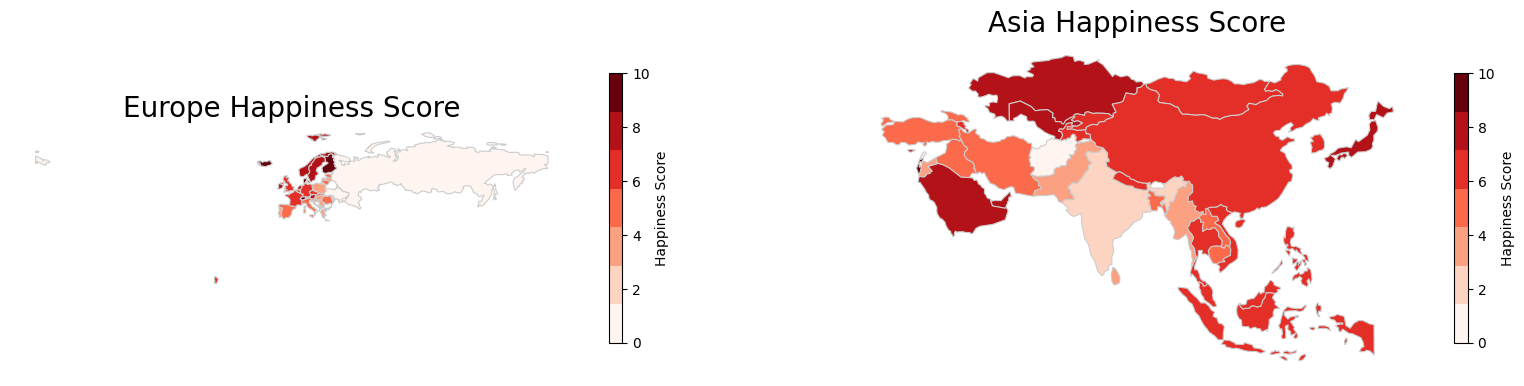

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/302groupshare/Happiness Datasets/2022.csv", usecols=['Country', 'Happiness score'])


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged = world.merge(df, left_on='name', right_on='Country')

cmap = plt.cm.get_cmap('Reds', 7)


europe = merged[merged['continent'] == 'Europe']
asia = merged[merged['continent'] == 'Asia']

fig, axs = plt.subplots(ncols=2, figsize=(20, 7))

europe.plot(column='Happiness score', cmap=cmap, linewidth=0.8, edgecolor='0.8', ax=axs[0])


axs[0].set_title('Europe Happiness Score', fontdict={'fontsize': 20})
axs[0].set_axis_off()


sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=10))
sm._A = []
cbar = fig.colorbar(sm, ax=axs[0], shrink=0.5)
cbar.set_label('Happiness Score')

asia.plot(column='Happiness score', cmap=cmap, linewidth=0.8, edgecolor='0.8', ax=axs[1])


axs[1].set_title('Asia Happiness Score', fontdict={'fontsize': 20})
axs[1].set_axis_off()

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=10))
sm._A = []
cbar = fig.colorbar(sm, ax=axs[1], shrink=0.5)
cbar.set_label('Happiness Score')


plt.show()


This map comparison shows us the difference in happiness scores between countries in Europe and Asia. We see that the happiness scores of European countries tend to be higher than those of Asian countries. We can also see that the distribution of happiness scores in Europe is more uniform, with most countries having a score above 5, whereas in Asia the distribution is more varied, with some countries having very high scores and others having very low scores. This could be because of cultural, social, and economic factors that contribute to differences in happiness between these two regions.

# Happiness Distribution Across Regions /AH


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt



Text(0.5, 1.0, 'Happiness Score Distribution by Region')

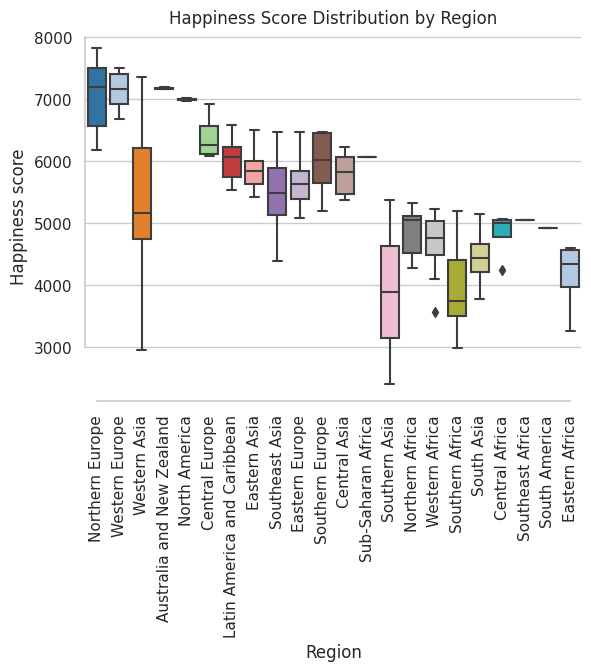

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/302groupshare/Happiness 2022_Regions.csv'',  usecols=['Region', 'Happiness score'])


df['Happiness score'] = df['Happiness score'].str.replace(',', '').astype(float)

sns.set(style="whitegrid")
sns.boxplot(x="Region", y="Happiness score", data=df, palette="tab20")
sns.despine(trim=True)
plt.xticks(rotation=90)
plt.title('Happiness Score Distribution by Region')

#Factors comparison contributing to Happiness Score /AH 

In [ ]:
!pip install plotnine


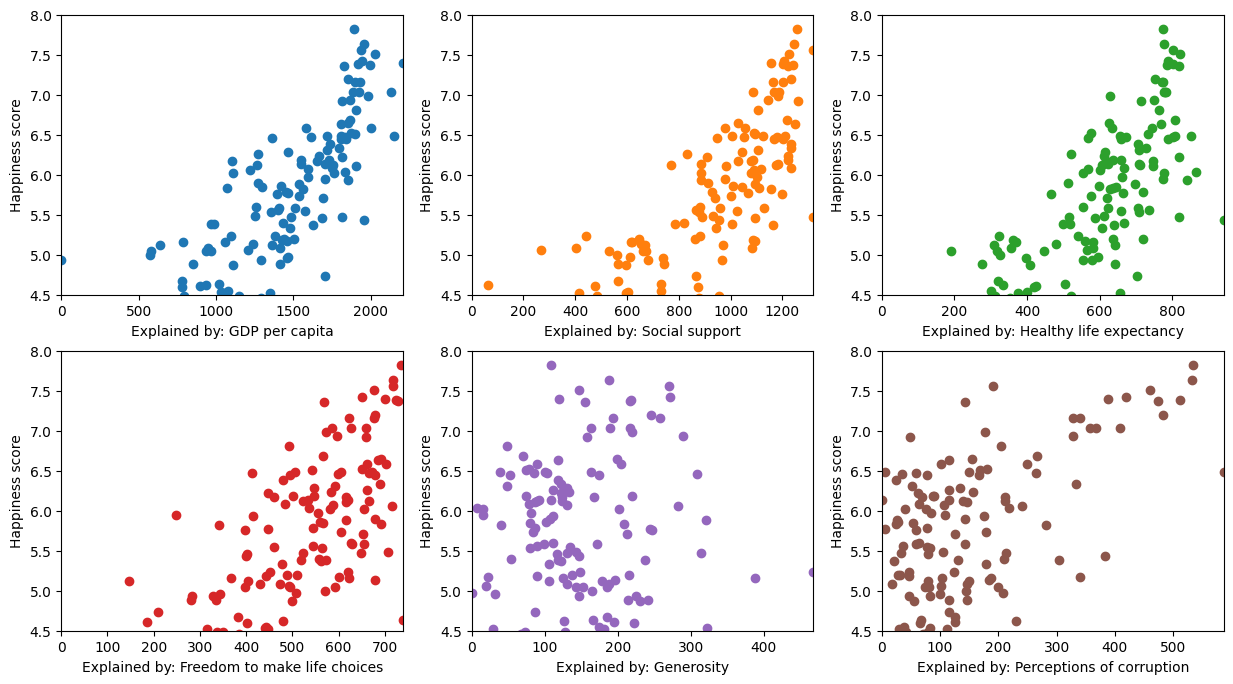

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/302groupshare/Happiness 2022_Regions.csv')


df['Explained by: GDP per capita'] = df['Explained by: GDP per capita'].str.replace(',', '').astype(float)
df['Explained by: Social support'] = df['Explained by: Social support'].str.replace(',', '').astype(float)
df['Explained by: Healthy life expectancy'] = df['Explained by: Healthy life expectancy'].str.replace(',', '').astype(float)
df['Explained by: Freedom to make life choices'] = df['Explained by: Freedom to make life choices'].str.replace(',', '').astype(float)
df['Explained by: Generosity'] = df['Explained by: Generosity'].str.replace(',', '').astype(float)
df['Explained by: Perceptions of corruption'] = df['Explained by: Perceptions of corruption'].str.replace(',', '').astype(float)


cols = ['Explained by: GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy',
        'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption']


happiness_range = (4.5, 8)

fig, axs = plt.subplots(2, 3, figsize=(15, 8))

for i, col in enumerate(cols):
    # Plot scatterplot
    ax = axs[i // 3][i % 3]
    ax.scatter(df[col], df['Happiness score'], color=f'C{i}')
    ax.set_xlabel(col)
    ax.set_ylabel('Happiness score')
    ax.set_xlim(df[col].min(), df[col].max())
    ax.set_ylim(happiness_range)

# Set the tick locations and labels
tick_locations = [4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8]
tick_labels = [str(tick) for tick in tick_locations]


plt.show()     





In [ ]:
 df.dtypes 

RANK                                            int64
Country                                        object
Region                                         object
Happiness score                               float64
Whisker-high                                   object
Whisker-low                                    object
Dystopia (1.83) + residual                     object
Explained by: GDP per capita                   object
Explained by: Social support                   object
Explained by: Healthy life expectancy          object
Explained by: Freedom to make life choices     object
Explained by: Generosity                       object
Explained by: Perceptions of corruption        object
dtype: object

From the scatterplots, we can see that there is a general positive correlation between each factor and the happiness score. However, the strength of the correlation varies across the factors. The strongest positive correlation is seen between the happiness score and GDP per capita, followed by social support and healthy life expectancy. Freedom to make life choices, generosity, and perceptions of corruption also show a positive correlation with happiness score, but the relationship is weaker.

# Comparing Happiness Score Over Period of Time /AH 

In [ ]:
import pandas as pd

df_2018 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/302groupshare/Happiness Datasets/2018.csv')
df_2019 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/302groupshare/Happiness Datasets/2019.csv')
df_2020 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/302groupshare/Happiness Datasets/2020.csv')
df_2021 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/302groupshare/Happiness Datasets/2021.csv')
df_2022 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/302groupshare/Happiness Datasets/2022.csv')

temp_df['Happiness score'].interpolate(inplace=True)

<ipython-input-4-313ce0a8c622>:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_df = temp_df.groupby(['Region', 'Year']).mean().reset_index()
<ipython-input-4-313ce0a8c622>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
<ipython-input-4-313ce0a8c622>:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_df = temp_df.groupby(['Region', 'Year']).mean().reset_index()
<ipython-input-4-313ce0a8c622>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

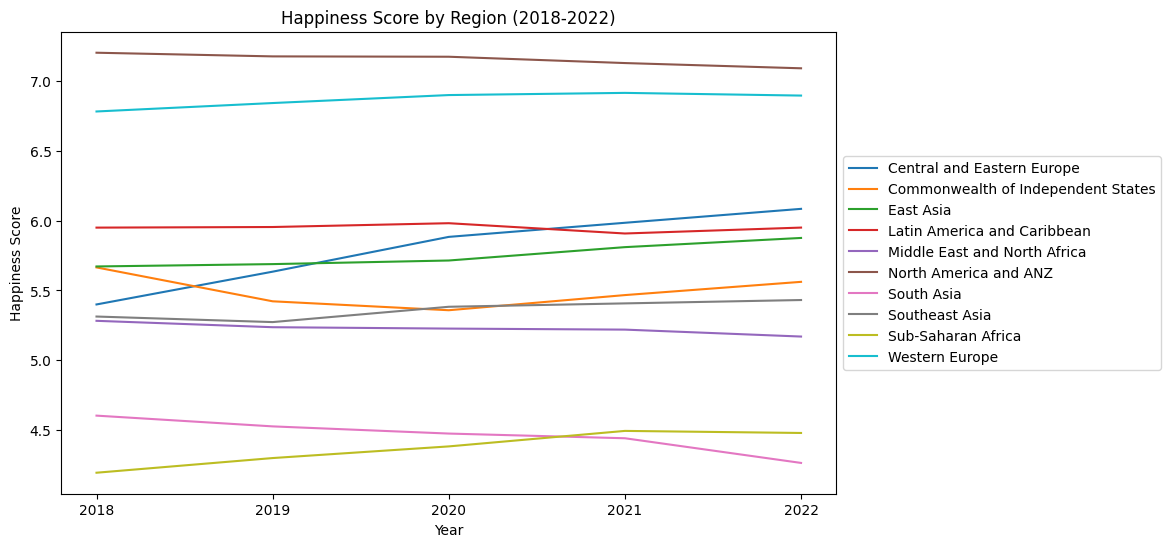

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a list of years
years = [2018, 2019, 2020, 2021, 2022]

df = pd.DataFrame()

# Loop through each year and read the corresponding csv file
for year in years:
  file_path = "/content/drive/MyDrive/Colab Notebooks/302groupshare/Happiness Datasets/{}.csv".format(year)
  temp_df = pd.read_csv(file_path)


  temp_df = temp_df[['Country', 'Region', 'Happiness score']]

  temp_df['Year'] = year

  temp_df = temp_df.groupby(['Region', 'Year']).mean().reset_index()
  
  temp_df = temp_df.interpolate()

  df = df.append(temp_df)


df_pivot = df.pivot(index='Year', columns='Region', values='Happiness score')

# Plot the line chart
ax = df_pivot.plot(kind='line', figsize=(10,6))

ax.set_title("Happiness Score by Region (2018-2022)")
ax.set_xlabel("Year")
ax.set_ylabel("Happiness Score")

ax.set_xticks(years)

ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()



The overall happiness score has been increasing for most regions from 2018 to 2022, indicating a general improvement in the well-being of people around the world.

The regions with the highest happiness scores consistently across the five years are North America, Australia and New Zealand, and Western Europe. This is suggestive that these regions have a high level of social and economic development, and people living there tend to be relatively happy.

The regions with the lowest happiness scores are consistently Sub-Saharan Africa and South Asia. This could be an indicator that people living in these regions are facing significant challenges related to poverty, conflict, and other social and economic factors.

There is some variation in the happiness scores for different regions over time. For example, Latin America and the Caribbean experienced a dip in happiness scores in 2020, which could be due to the COVID-19 pandemic and economic and social disruptions.

In [ ]:
# Get the top 10 countries
top_10 = df.nlargest(10, 'Happiness score')

# Group the data by country and calculate the mean for each factor
grouped = top_10.groupby('Country')[['Explained by: GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption']].mean(numeric_only=True)

# Create the bar chart
ax = grouped.plot(kind='bar', figsize=(10,6), rot=0)
ax.set_xlabel('Factors')
ax.set_ylabel('Average Value')
ax.set_title('Average Value of Factors Across Top 10 Countries')
plt.show()



TypeError: ignored

test

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd
print(os.listdir('/content/drive/MyDrive/302groupshare/Happiness Datasets'))
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
    # Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
    nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv('/content/drive/MyDrive/302groupshare/Happiness Datasets/2022.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = '/content/drive/MyDrive/302groupshare/Happiness Datasets/2022.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')
df1.head(5)

['2018.csv', '2019.csv', '2020.csv', '2022.csv', '2021.csv']


NameError: ignored

In [ ]:
plotCorrelationMatrix(df1, 8)

No correlation plots shown: The number of non-NaN or constant columns (0) is less than 2


<ipython-input-4-a41c72d38fc0>:32: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
